### Making necessary imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
#!pip install wordcloud
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [3]:
import sys
print(sys.executable)

/anaconda3/bin/python


In [4]:
!pip install mlxtend

### Loading and manipulating data

##### Downloaded two dataframes with pandas: fake and real news 

In [5]:
fake_df = pd.read_csv("NewsData/Fake.csv")

In [6]:
fake_df['label'] = 'Fake'

In [7]:
fake_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [8]:
true_df = pd.read_csv("NewsData/True.csv")

In [9]:
true_df['label'] = 'True'

In [10]:
true_df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


###### Adding additional column with a label "fake" or "real" before merging two dataframes into one. 

In [11]:
fake_df["flag"] = 0
true_df["flag"] = 1

In [12]:
fake_df.head()

,title,text,subject,date,label,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,0


In [13]:
true_df.head()

,title,text,subject,date,label,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,1


In [14]:
fake_df.shape

(23481, 6)

In [15]:
true_df.shape

(21417, 6)

###### Joining two dataframes into one 

In [16]:
news_df = fake_df.copy()

In [17]:
news_df = news_df.append(true_df)

In [18]:
news_df.head()

,title,text,subject,date,label,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,0


In [19]:
news_df.shape

(44898, 6)

In [20]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 6 columns):
title      44898 non-null object
text       44898 non-null object
subject    44898 non-null object
date       44898 non-null object
label      44898 non-null object
flag       44898 non-null int64
dtypes: int64(1), object(5)
memory usage: 2.4+ MB


##### Cleaning from duplicates (test dataframe)

In [21]:
news_df = news_df.drop_duplicates()

In [22]:
news_df.shape

(44689, 6)

In [23]:
news_df = news_df.reset_index(drop=True)

In [24]:
news_df.head()

,title,text,subject,date,label,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,0


In [25]:
news_df.tail()

,title,text,subject,date,label,flag
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True,1
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True,1
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True,1
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True,1
44688,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",True,1


In [26]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 6 columns):
title      44689 non-null object
text       44689 non-null object
subject    44689 non-null object
date       44689 non-null object
label      44689 non-null object
flag       44689 non-null int64
dtypes: int64(1), object(5)
memory usage: 2.0+ MB


##### Changing date format datetime: testing on a copy (it's ok to delete)

In [27]:
news_df2 = news_df.copy()

In [29]:
news_df2.head()

,title,text,subject,date,label,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,0


In [30]:
news_df2.date.unique()

array(['December 31, 2017', 'December 30, 2017', 'December 29, 2017', ...,
       'January 15, 2016 ', 'January 14, 2016 ', 'January 13, 2016 '],
      dtype=object)

In [31]:
news_df2['date'] = pd.to_datetime(news_df2['date'], errors = 'coerce')

In [32]:
news_df2 = news_df2.dropna(axis=0)

##### Changing date format datetime as a new column (working with original dataframe)

In [35]:
news_df['datetime'] = news_df['date']

In [36]:
news_df.head()

,title,text,subject,date,label,flag,datetime
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,0,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,0,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,0,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,0,"December 25, 2017"


In [37]:
news_df['datetime'] = pd.to_datetime(news_df['datetime'], errors = 'coerce')

In [39]:
news_df = news_df.dropna(axis=0)

In [235]:
news_df.head()

,title,text,subject,date,label,flag,datetime,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0,2017-12-31,2017,2017-12
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,0,2017-12-31,2017,2017-12
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,0,2017-12-30,2017,2017-12
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,0,2017-12-29,2017,2017-12
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,0,2017-12-25,2017,2017-12


### Stripping a word from the original Dataset

##### Testing on a true slice 

In [339]:
true_df_replaced = true_df.text
true_df_replaced = true_df_replaced.str.replace('(WASHINGTON|Reuters)', '')
true_df_replaced.head()

0     () - The head of a conservative Republican fa...
1     () - Transgender people will be allowed for t...
2     () - The special counsel investigation of lin...
3     () - Trump campaign adviser George Papadopoul...
4    SEATTLE/ () - President Donald Trump called on...
Name: text, dtype: object

##### Changing the whole dataset

In [340]:
news_df_modified = news_df.text
news_df_modified = news_df_modified.str.replace('(WASHINGTON|Reuters)', '')
news_df_modified.head()

0    Donald Trump just couldn t wish all Americans ...
1    House Intelligence Committee Chairman Devin Nu...
2    On Friday, it was revealed that former Milwauk...
3    On Christmas day, Donald Trump announced that ...
4    Pope Francis used his annual Christmas Day mes...
Name: text, dtype: object

### Working with non-text data, making graphs to analyse news picks and proportions 

In [42]:
news_df.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [43]:
news_df['year'] = pd.to_datetime(news_df['datetime']).dt.to_period('Y')
news_df['month'] = pd.to_datetime(news_df['datetime']).dt.to_period('M')
news_df['month'] = news_df['month'].astype(str)

In [44]:
news_df.head()

,title,text,subject,date,label,flag,datetime,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0,2017-12-31,2017,2017-12
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,0,2017-12-31,2017,2017-12
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,0,2017-12-30,2017,2017-12
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,0,2017-12-29,2017,2017-12
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,0,2017-12-25,2017,2017-12


In [45]:
plotting1 = news_df[['month', 'flag']]

In [46]:
plotting1 = (plotting1.groupby(['month', 'flag']).apply(lambda x: (x['flag'] == 1).count()).reset_index(name='count'))

In [47]:
news_df[news_df['month'] == '2015-03']

,title,text,subject,date,label,flag,datetime,year,month
15882,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,"Mar 31, 2015",Fake,0,2015-03-31,2015,2015-03
15883,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,politics,"Mar 31, 2015",Fake,0,2015-03-31,2015,2015-03
15884,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,"Mar 31, 2015",Fake,0,2015-03-31,2015,2015-03
15885,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,"Mar 31, 2015",Fake,0,2015-03-31,2015,2015-03
15886,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,"Mar 31, 2015",Fake,0,2015-03-31,2015,2015-03
15887,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,"Mar 31, 2015",Fake,0,2015-03-31,2015,2015-03
21915,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,"Mar 31, 2015",Fake,0,2015-03-31,2015,2015-03
21916,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,"Mar 31, 2015",Fake,0,2015-03-31,2015,2015-03


In [48]:
plotting1_1 = plotting1[plotting1['flag'] == 1]
plotting_0 = plotting1[plotting1['flag'] == 0]

In [49]:
print(plotting1.shape)
print(plotting1_1.shape)
print(plotting_0.shape)

(59, 3)
(24, 3)
(35, 3)


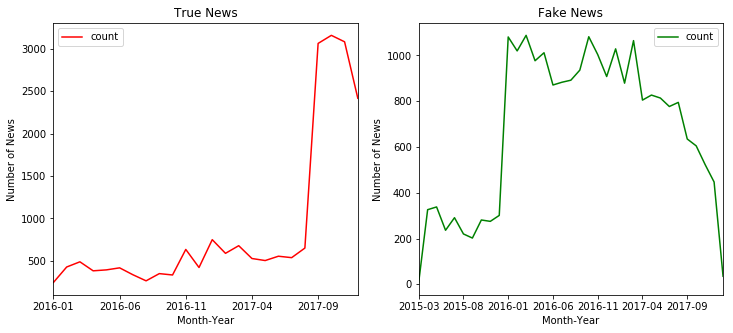

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plotting1_1.plot(ax=ax[0], x='month', y='count', color='red')
ax[0].set_title('True News')
ax[0].set_xlabel('Month-Year')
ax[0].set_ylabel('Number of News')

plotting_0.plot(ax=ax[1], x='month', y='count', color='green')
ax[1].set_title('Fake News')
ax[1].set_xlabel('Month-Year')
ax[1].set_ylabel('Number of News')

plt.show()

In [51]:
sub = news_df[['month', 'flag']]
sub = sub.groupby(['month'])['flag'].sum()

In [52]:
plotting_sub = news_df[['subject', 'flag']]
plotting_sub = (plotting_sub.groupby(['subject', 'flag']).apply(lambda x: (x['flag'] == 1).count()).reset_index(name='count'))

In [53]:
plotting_sub_0 = plotting_sub[plotting_sub['flag'] == 0]
plotting_sub_1 = plotting_sub[plotting_sub['flag'] == 1]

In [54]:
print(plotting_sub.shape)
print(plotting_sub_0.shape)
print(plotting_sub_1.shape)

(8, 3)
(6, 3)
(2, 3)


In [55]:
plotting_sub_1

,subject,flag,count
6,politicsNews,1,11220
7,worldnews,1,9991


In [56]:
plotting_sub_0

,subject,flag,count
0,Government News,0,1568
1,Middle-east,0,778
2,News,0,9050
3,US_News,0,783
4,left-news,0,4456
5,politics,0,6833


In [57]:
plotting_sub

,subject,flag,count
0,Government News,0,1568
1,Middle-east,0,778
2,News,0,9050
3,US_News,0,783
4,left-news,0,4456
5,politics,0,6833
6,politicsNews,1,11220
7,worldnews,1,9991


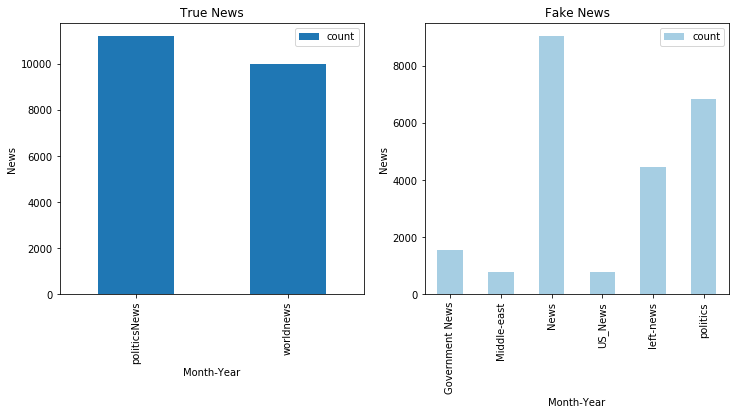

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plotting_sub_1.plot.bar(ax=ax[0], x='subject', y='count')
ax[0].set_title('True News')
ax[0].set_xlabel('Month-Year')
ax[0].set_ylabel('News')

plotting_sub_0.plot.bar(ax=ax[1], x='subject', y='count', colormap='Paired')
ax[1].set_title('Fake News')
ax[1].set_xlabel('Month-Year')
ax[1].set_ylabel('News')

plt.show()

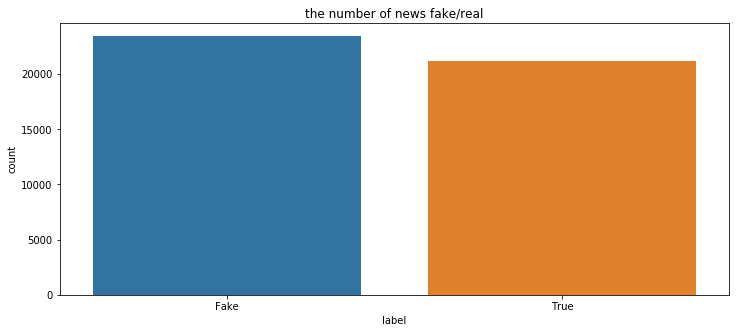

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
sns.countplot(news_df.label)
plt.title('the number of news fake/real');

### Word Cloud

##### Fake News Word Cloud 

In [60]:
nlp_alg = news_df.copy()

In [61]:
nlp_alg.head()

,title,text,subject,date,label,flag,datetime,year,month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake,0,2017-12-31,2017,2017-12
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake,0,2017-12-31,2017,2017-12
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake,0,2017-12-30,2017,2017-12
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake,0,2017-12-29,2017,2017-12
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake,0,2017-12-25,2017,2017-12


In [62]:
comment_words = '' 
stopwords = set(STOPWORDS)

#### Word Cloud for Fake News 

In [63]:
# Slice part of fake news to look at vocabulary
fake_slice = nlp_alg[nlp_alg['flag'] == 0]['title'].iloc[0:500] 

In [64]:
fake_slice.head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: title, dtype: object

In [66]:
for val in fake_slice:
    #val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens)+""

In [67]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='lightblue', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

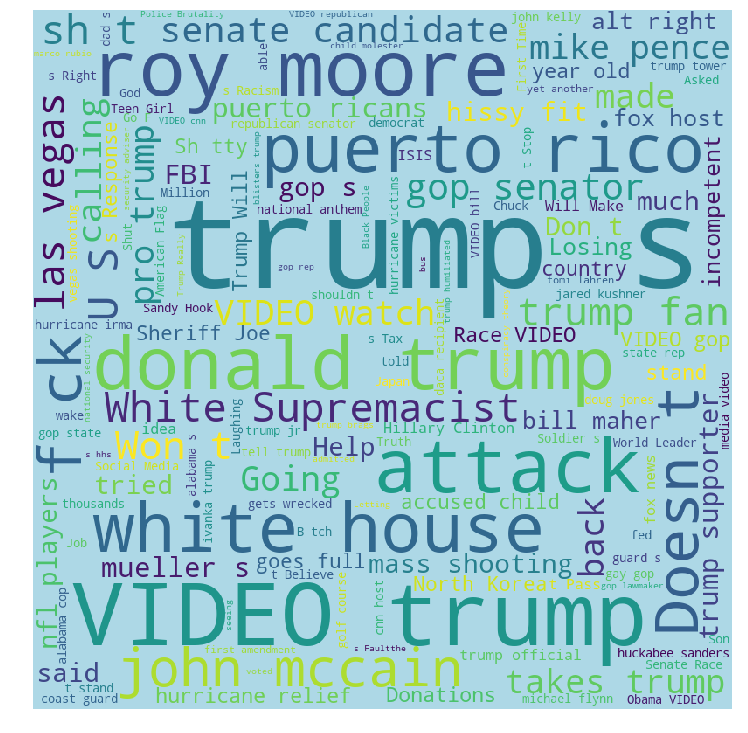

In [66]:
plt.figure(figsize = (10, 10)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

##### Real News Word Cloud 

In [68]:
real_comment_words = '' 

In [71]:
for val in real_slice:
    #val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        real_comment_words += " ".join(tokens)+""

In [72]:
real_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='lightblue', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_comment_words)

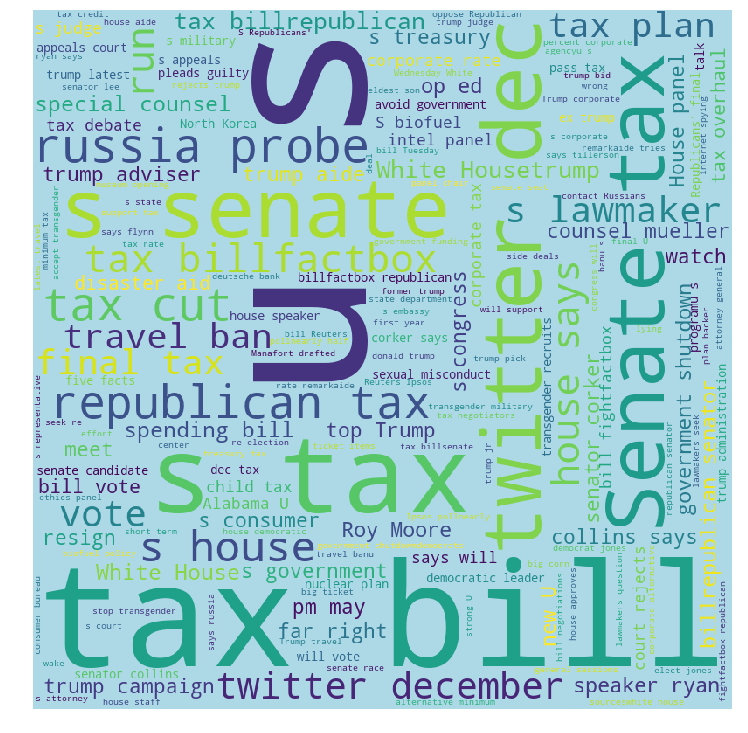

In [73]:
plt.figure(figsize = (10, 10)) 
plt.imshow(real_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

##### Word Cloud for Real News (with TfidfVectorizer)

In [74]:
# Slice part of real news to look at vocabulary
real_slice = nlp_alg[nlp_alg['flag'] == 1]['title'].iloc[0:500] 

In [89]:
vectorizer_model = TfidfVectorizer(stop_words='english')
vectors = vectorizer_model.fit_transform(real_slice)
feature_names = vectorizer_model.get_feature_names()
dense = vectors.todense()
list_of_words = dense.tolist()
data = pd.DataFrame(list_of_words, columns=feature_names)
data

,10,11,12,14,15,18,19,20,2016,2017,...,worried,worry,wrapped,wray,write,writer,wrong,year,years,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [90]:
data.T.sum(axis=1)
Cloud = WordCloud(background_color="lightblue", max_words=150).generate_from_frequencies(data.T.sum(axis=1))

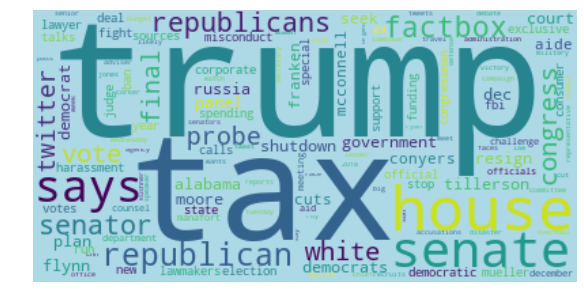

In [91]:
plt.figure(figsize=(12,5))
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Word Cloud for Fake News (with TfidfVectorizer)

In [78]:
fake_vectorizer_model = TfidfVectorizer(stop_words='english')
fake_vectors = fake_vectorizer_model.fit_transform(fake_slice)
fake_feature_names = fake_vectorizer_model.get_feature_names()
fake_dense = fake_vectors.todense()
fake_list_of_words = fake_dense.tolist()
fake_data = pd.DataFrame(fake_list_of_words, columns=fake_feature_names)
fake_data

,000,10,100k,11,13,1993,2016,2018,2020,25,...,years,yelling,yesterday,yiannopoulos,york,yulín,zealand,zero,zilch,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
fake_data.T.sum(axis=1)
Fake_Cloud = WordCloud(background_color="lightblue", max_words=150).generate_from_frequencies(fake_data.T.sum(axis=1))

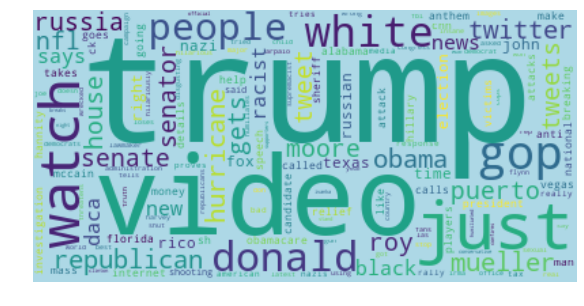

In [80]:
plt.figure(figsize=(12,5))
plt.imshow(Fake_Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Splitting the dataset intro training and testing sets 

In [81]:
labels = nlp_alg.label
labels.head()

0    Fake
1    Fake
2    Fake
3    Fake
4    Fake
Name: label, dtype: object

In [82]:
x_train, x_test, y_train, y_test = train_test_split(nlp_alg.text, labels, test_size = 0.2, random_state=123)

### Initializing TfidfVectorizer

In [92]:
tf_idf = TfidfVectorizer(stop_words = 'english', 
                         token_pattern = '[A-Za-z]+',
                         ngram_range = (1,3),
                         max_df = 0.5, min_df = 3)
tfidf_train = tf_idf.fit_transform(x_train)
tfidf_test = tf_idf.transform(x_test)

In [246]:
tf_idf.vocabulary_

{'barack': 58887,
 'obama': 473519,
 'historic': 311332,
 'visit': 793967,
 'hiroshima': 311193,
 'week': 810172,
 'honour': 315058,
 'lost': 407000,
 'world': 824106,
 'war': 801837,
 'ii': 323852,
 'wednesday': 809316,
 'hours': 317189,
 'arriving': 43312,
 'japan': 355188,
 'group': 290556,
 'seven': 668011,
 'summit': 712379,
 'barack obama': 58901,
 'obama s': 475107,
 's historic': 622900,
 'historic visit': 311411,
 'visit hiroshima': 794089,
 'lost world': 407295,
 'world war': 824994,
 'war ii': 802188,
 'ii president': 323865,
 'president said': 536883,
 'said wednesday': 643191,
 'wednesday hours': 809617,
 'hours arriving': 317203,
 'japan group': 355237,
 'group seven': 291629,
 'seven summit': 668165,
 'barack obama s': 59127,
 'obama s historic': 475245,
 's historic visit': 622906,
 'world war ii': 825003,
 'war ii president': 802193,
 'president said wednesday': 536918,
 'japan group seven': 355238,
 'group seven summit': 291633,
 'sad': 633983,
 'watch': 805111,
 'you

In [93]:
x_train.head()

13820    Barack Obama s historic visit to Hiroshima thi...
9209     It s beyond sad to watch these young men sitti...
18762    It s a sad day in New Orleans Cultural Marxism...
26295    (Reuters) - The U.S. Senate’s intelligence com...
2780     In what can only be seen as a groundbreaking a...
Name: text, dtype: object

In [94]:
y_train.head()

13820    Fake
9209     Fake
18762    Fake
26295    True
2780     Fake
Name: label, dtype: object

### Decision Tree Classifier

In [95]:
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(tfidf_train, y_train)
dec_y_pred = dec_tree_model.predict(tfidf_test)
dec_score = accuracy_score(y_test, dec_y_pred)
print(dec_score)

0.9968666069829901


###### Decision Tree Prediction Probabilities

In [205]:
dc_y_pred_proba = dec_tree_model.predict_proba(tfidf_test)

In [206]:
dc_y_pred_proba

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

###### Decision Tree Feature Importance

In [96]:
dec_tree_model.feature_importances_.argmax()

597711

In [97]:
dectree_importance = dec_tree_model.feature_importances_

In [98]:
dectree_sorted_indices = np.argsort(dectree_importance)[-20:]
dectree_sorted_indices

array([448397,  98841, 627757, 202288, 277403, 470629, 364682, 535394,
       598961, 197140, 474669, 226097, 600843, 566629, 834408, 324040,
       514304, 691500, 248041, 597711])

In [99]:
dec_features = []
for i in dectree_sorted_indices:
    dec_features.append(tf_idf.get_feature_names()[i])

In [100]:
dec_features

['mountains run',
 'cases economic espionage',
 's polling',
 'does guarantee',
 'getty',
 'nov presidential election',
 'just released',
 'president finally',
 'reuters reports',
 'disclosure agreement',
 'obama lying',
 'entire story',
 'rhesus',
 'read reuters',
 'zero hedge',
 'illegal aliens',
 'pic twitter',
 'st century wire',
 'featured image',
 'reuters']

Text(0.5, 0, 'Relative Importance')

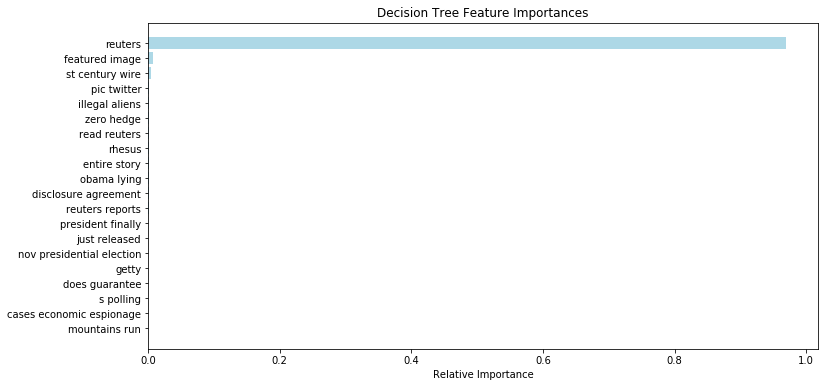

In [101]:
plt.figure(figsize=(12,6))
plt.title('Decision Tree Feature Importances')
plt.barh(range(len(dectree_sorted_indices)), dectree_importance[dectree_sorted_indices], color='lightblue', align='center')
plt.yticks(range(len(dectree_sorted_indices)), dec_features)
plt.xlabel('Relative Importance')

### Random Forest Classifier

In [190]:
rf_model = RandomForestClassifier()
rf_model.fit(tfidf_train,y_train)
rf_y_pred = rf_model.predict(tfidf_test)
rf_score = accuracy_score(y_test, rf_y_pred)
print(rf_score)

0.9919427036705462


###### Random Forest Prediction Probabilities

In [186]:
rf_y_pred_proba = rf_model.predict_proba(tfidf_test)
#rf_score_pred_proba = score(y_test, rf_y_pred_proba)
#model.predict_proba(test)[:,1]

In [187]:
rf_y_pred_proba

array([[0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.38, 0.62],
       ...,
       [0.38, 0.62],
       [0.36, 0.64],
       [0.4 , 0.6 ]])

###### Random Forest Feature Importance 

In [107]:
rf_model.feature_importances_.argmax()
#top 10 words - to check 

597711

In [108]:
importance = rf_model.feature_importances_

In [109]:
sorted_indices = np.argsort(importance)[-20:]
sorted_indices

array([803690, 742283, 749228, 192967, 324840, 599349, 805111, 773793,
       804509, 599351, 248024, 771909, 363303, 438505, 248041, 804384,
       720970, 772886, 773058, 597711])

In [110]:
features = []
for i in sorted_indices:
    features.append(tf_idf.get_feature_names()[i])

In [111]:
features

['washington',
 'thursday',
 'told reuters',
 'didn',
 'image',
 'reuters u',
 'watch',
 'u s president',
 'washington reuters u',
 'reuters u s',
 'featured',
 'twitter com',
 'just',
 'minister',
 'featured image',
 'washington reuters',
 't',
 'u',
 'u s',
 'reuters']

Text(0.5, 0, 'Relative Importance')

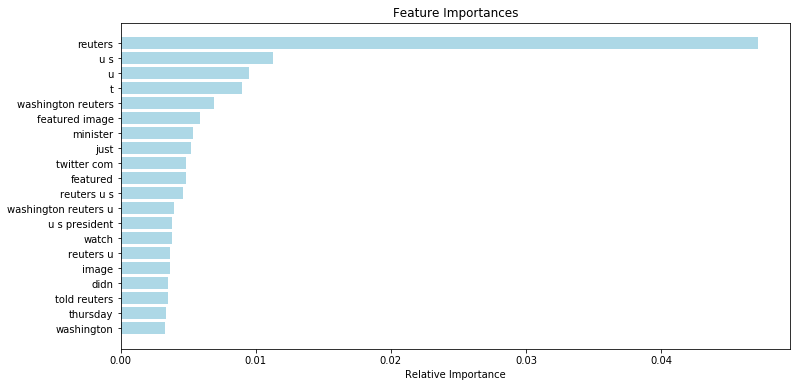

In [112]:
plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.barh(range(len(sorted_indices)), importance[sorted_indices], color='lightblue', align='center')
plt.yticks(range(len(sorted_indices)), features)
plt.xlabel('Relative Importance')

In [113]:
sorted_indices

array([803690, 742283, 749228, 192967, 324840, 599349, 805111, 773793,
       804509, 599351, 248024, 771909, 363303, 438505, 248041, 804384,
       720970, 772886, 773058, 597711])

In [248]:
tf_idf.get_feature_names()[597711]

'reuters'

#### Random Forest: Permutation Feature Importance (still working on)

In [105]:
from mlxtend.evaluate import feature_importance_permutation

In [167]:
x_test.head()

16202    The social media director for Trump called the...
26075    WASHINGTON (Reuters) - Russia’s ambassador to ...
35328    TIRANA (Reuters) - Opposition lawmakers threw ...
19556    The city s first transgender police officer wa...
25341    WASHINGTON (Reuters) - U.S. President Donald T...
Name: text, dtype: object

In [166]:
print(x_test.shape)
print(y_test.shape)

(8936,)
(8936,)


In [249]:
#imp_vals, _ = feature_importance_permutation(
    #predict_method=rf_model.predict, X=tfidf_test, y=y_test.values.reshape(-1,1), metric="accuracy", num_rounds=1, seed=1)

#imp_vals

In [ ]:
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
#from rfpimp import permutation_importances

#### Params (still needs some work)

In [183]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV

In [185]:
kf=KFold()
rf_pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])
rf_grid_params = {}
rf_grid = GridSearchCV(rf_pipe, rf_grid_params, cv=kf, scoring = 'roc_auc')
rf_grid.fit(tfidf_train,y_train)
print("Random Forest Testing Accuracy: {}".format(rf_grid.score(tfidf_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 307, in _fit
    **fit_params_steps[name])
  File "/anaconda3/lib/python3.7/site-packages/joblib/memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/anaconda3/lib/python3.7/site-packages/sklearn/

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [ ]:
rf_pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier())])
rf_grid_params = {}
rf_grid = GridSearchCV(rf_pipe, rf_grid_params, cv=kf, scoring = 'roc_auc')
rf_grid.fit(X_train, y_train)
print("Random Forest Testing Accuracy: {}".format(rf_grid.score(X_test, y_test)))

### Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=123)
lr_model.fit(tfidf_train,y_train)
lr_y_pred = lr_model.predict(tfidf_test)
lr_score = accuracy_score(y_test, lr_y_pred)
print(lr_score)

0.9876902417188899


###### Logistic Regression Prediction Probabilities

In [229]:
lr_y_pred_proba = lr_model.predict_proba(tfidf_test)
lr_y_pred_proba 

array([[0.87681345, 0.12318655],
       [0.02864992, 0.97135008],
       [0.01808379, 0.98191621],
       ...,
       [0.08023441, 0.91976559],
       [0.02426171, 0.97573829],
       [0.00762601, 0.99237399]])

### Naive Bayes Classifier for Multinomial Model

In [212]:
mlt = MultinomialNB()
mlt.fit(tfidf_train,y_train)
mlt_y_pred = mlt.predict(tfidf_test)
mlt_score = accuracy_score(y_test, mlt_y_pred)
print(mlt_score)

0.9620635631154879


###### Naive Bayes Prediction Probabilities

In [250]:
nb_y_pred_proba = mlt.predict_proba(tfidf_test)
nb_y_pred_proba

array([[9.81266066e-01, 1.87339336e-02],
       [1.47962501e-03, 9.98520375e-01],
       [9.43356779e-03, 9.90566432e-01],
       ...,
       [8.33237754e-04, 9.99166762e-01],
       [2.69794800e-05, 9.99973021e-01],
       [4.31896038e-04, 9.99568104e-01]])

### Gradient Boosting 

In [316]:
from sklearn.ensemble import GradientBoostingClassifier

In [317]:
grb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
grb_model.fit(tfidf_train,y_train)
grb_y_pred = mlt.predict(tfidf_test)
grb_score = accuracy_score(y_test, grb_y_pred)

In [325]:
print(grb_score)

0.9620635631154879


In [327]:
#grb_score2 = grb_model.score(y_test, grb_y_pred)

### Passive Aggressive Classifier

In [213]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)
y_pred = model.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.996307072515667


### Graphing Accuracy Scores

In [251]:
scores = pd.DataFrame({'model': ['Decision Tree Classifier', 'Random Forest Classifier', 'Naive Bayes', 'Logistic Regression', 'Passive Aggressive Classifier'], 
                       'score': [0.9961, 0.9904, 0.9603, 0.9877, 0.9956]})

<BarContainer object of 5 artists>

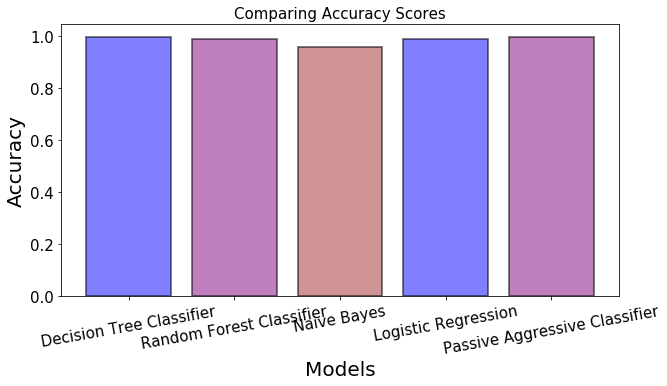

In [252]:
plt.figure(figsize=(10,5))
plt.title('Comparing Accuracy Scores',fontsize=15)
colors=['blue','purple','brown']
plt.xticks(fontsize=15, rotation=10)
plt.yticks(fontsize=15)
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(scores.model,scores.score,edgecolor='black',color=colors, linewidth=2,alpha=0.5)

### Confusion Matrix

#### Decision Tree Confusion Matrix 

In [120]:
from sklearn.metrics import confusion_matrix
dtc_cm = confusion_matrix(y_test, dec_y_pred, labels=['Fake','True'])
print(dtc_cm)

[[4611   10]
 [  18 4297]]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b2a1e0198>)

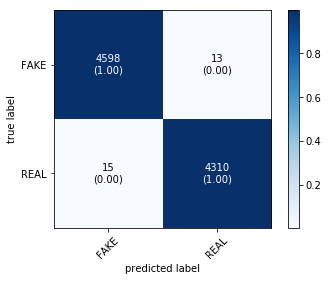

In [115]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=dtc_cm, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

#### Random Forest Confusion Matrix 

In [117]:
rf_cm = confusion_matrix(y_test, rf_y_pred, labels=['Fake','True'])
print(rf_cm)

[[4576   45]
 [  32 4283]]


In [137]:
y_test.head()

16202    Fake
26075    True
35328    True
19556    Fake
25341    True
Name: label, dtype: object

In [124]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b5f0d3470>)

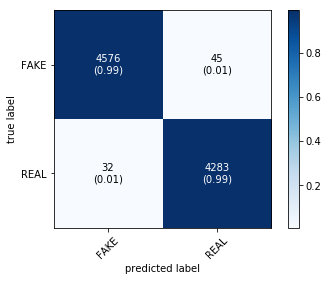

In [125]:
plot_confusion_matrix(conf_mat=rf_cm, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

#### Wrong Predictions 

In [141]:
x_test[y_test != rf_y_pred]

30899     (Editors note: Attention to language in parag...
27741    KANSAS CITY, Kan (Reuters) - Kansas Republican...
24958    (Reuters) - “What Happened,” Hillary Clinton’s...
31860    CHARLOTTE, N.C. (Reuters) - Republican preside...
11795    Though they are officially  non-profit  organi...
29603    WASHINGTON (Reuters) - One of the biggest chee...
9510     President Trump received a warm welcome when h...
9310     The broader story in this entire Russia witch ...
11379    A WARNING shot has been fired at North Korea b...
39956    HODEIDAH, Yemen (Reuters) - Smiling and sittin...
29762    LOS ANGELES (Reuters) - Editors Note: Attentio...
31200    SHERMANS DALE, Penn. (Reuters) - While Donald ...
17062    Does anyone remember Vladimir Putin pushing Ge...
31287    GREENSBORO, N.C. (Reuters) - President Barack ...
9728     President Trump just exposed one of the bigges...
39110    PALONG KHALI, Bangladesh (Reuters) - Hannah Mc...
17138    Follow the money on this one Mexico is spendin.

In [139]:
df(y_test!=rf_y_pred)

77

In [142]:
df = pd.DataFrame(x_test)
df["actual"] = y_test
df["predicted"] = rf_y_pred

incorrect = df[df["actual"] != df["predicted"]]

In [144]:
incorrect.shape

(77, 3)

In [145]:
incorrect.head()

,text,actual,predicted
30899,(Editors note: Attention to language in parag...,True,Fake
27741,"KANSAS CITY, Kan (Reuters) - Kansas Republican...",True,Fake
24958,"(Reuters) - “What Happened,” Hillary Clinton’s...",True,Fake
31860,"CHARLOTTE, N.C. (Reuters) - Republican preside...",True,Fake
11795,Though they are officially non-profit organi...,Fake,True


#### Logistic Regression Confusion Matrix

In [259]:
lr_cm = confusion_matrix(y_test, lr_y_pred, labels=['Fake','True'])
print(lr_cm)

[[4551   70]
 [  40 4275]]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b202f5208>)

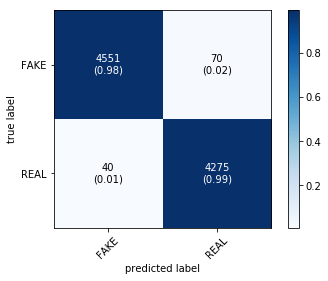

In [260]:
plot_confusion_matrix(conf_mat=lr_cm, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

#### Passive Agressive Confusion Matrix

In [257]:
pa_cm = confusion_matrix(y_test, y_pred, labels=['Fake','True'])
print(pa_cm)

[[4601   20]
 [  13 4302]]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bc1619390>)

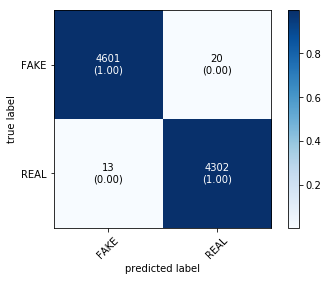

In [258]:
plot_confusion_matrix(conf_mat=pa_cm, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

#### NB Multinomial Confusion Matrix

In [121]:
mlt_cm = confusion_matrix(y_test, mlt_y_pred, labels=['Fake','True'])
print(mlt_cm)

[[4436  175]
 [ 192 4133]]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b6168b160>)

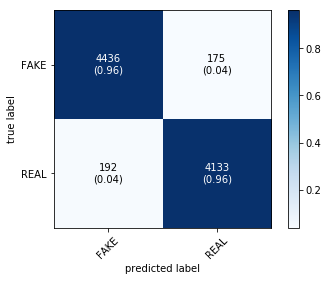

In [122]:
plot_confusion_matrix(conf_mat=mlt_cm, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

### Predicting on a new dataset of news: 2 real and 2 fake news 

In [261]:
scores = pd.DataFrame({'model': ['Decision Tree Classifier', 'Random Forest Classifier', 'Naive Bayes', 'Logistic Regression', 'Passive Aggressive Classifier'], 
                       'score': [0.9961, 0.9904, 0.9603, 0.9877, 0.9956]})

In [262]:
scores

,model,score
0,Decision Tree Classifier,0.9961
1,Random Forest Classifier,0.9904
2,Naive Bayes,0.9603
3,Logistic Regression,0.9877
4,Passive Aggressive Classifier,0.9956


In [88]:
true_df.head()

,title,text,subject,date,label,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,1


### Building a New DataSet

In [218]:
text_nyt = "nyt - Security guards failed to intervene while a man kicked and stomped on a 65-year-old woman near Times Square, yelling, 'You don’t belong here.'"
text_bbc = "bbc - Australia has fallen 3.4 million doses short of its target of delivering four million Covid vaccinations by 31 March, prompting criticism of the government."
text_snopes = "In July 2016, a the web site WTOE 5 News  reported that Pope Francis had broken with tradition and unequivocally endorsed Donald Trump for President of the United State"
text_greatgameindia = "Last year a mysterious shipment was caught smuggling Coronavirus from Canada. It was traced to Chinese agents working at a Canadian lab. Subsequent investigation by GreatGameIndia linked the agents to Chinese Biological Warfare Program from where the virus is suspected to have leaked causing the Wuhan Coronavirus outbreak."


In [219]:
test_news = pd.DataFrame({'title': ["Brutal Attack on Filipino Woman Sparks Outrage: ‘Everybody Is on Edge'", "Covid: Australia falls 85% short of vaccine delivery goal", 'Pope Francis Shocks World, Endorses Donald Trump for President','Coronavirus Bioweapon – How China Stole Coronavirus From Canada And Weaponized It'], 
                       'text':[text_nyt, text_bbc, text_snopes, text_greatgameindia], 'subject': ['US', 'world', 'politics', 'health'], 'date': ['March 30, 2021', 'March 30, 2021', 'July 10, 2016', 'January 26, 2020'], 'label': ['True', 'True', 'Fake', 'Fake'], 'flag': [1, 1, 0, 0]})




In [220]:
test_news

,title,text,subject,date,label,flag
0,Brutal Attack on Filipino Woman Sparks Outrage...,nyt - Security guards failed to intervene whil...,US,"March 30, 2021",True,1
1,Covid: Australia falls 85% short of vaccine de...,bbc - Australia has fallen 3.4 million doses s...,world,"March 30, 2021",True,1
2,"Pope Francis Shocks World, Endorses Donald Tru...","In July 2016, a the web site WTOE 5 News repo...",politics,"July 10, 2016",Fake,0
3,Coronavirus Bioweapon – How China Stole Corona...,Last year a mysterious shipment was caught smu...,health,"January 26, 2020",Fake,0


In [221]:
y = test_news.label
y

0    True
1    True
2    Fake
3    Fake
Name: label, dtype: object

In [163]:
X = list(test_news.text)

In [166]:
print(type(X))
print(len(X))

<class 'list'>
4


In [222]:
tf_idf = TfidfVectorizer(stop_words = 'english', 
                         token_pattern = '[A-Za-z]+',
                         ngram_range = (1,3),
                         max_df = 0.5, min_df = 3)
tfidf_train = tf_idf.fit_transform(x_train)
tfidf_test = tf_idf.transform(x_test)

In [255]:
tf_idf.vocabulary_

{'barack': 58887,
 'obama': 473519,
 'historic': 311332,
 'visit': 793967,
 'hiroshima': 311193,
 'week': 810172,
 'honour': 315058,
 'lost': 407000,
 'world': 824106,
 'war': 801837,
 'ii': 323852,
 'wednesday': 809316,
 'hours': 317189,
 'arriving': 43312,
 'japan': 355188,
 'group': 290556,
 'seven': 668011,
 'summit': 712379,
 'barack obama': 58901,
 'obama s': 475107,
 's historic': 622900,
 'historic visit': 311411,
 'visit hiroshima': 794089,
 'lost world': 407295,
 'world war': 824994,
 'war ii': 802188,
 'ii president': 323865,
 'president said': 536883,
 'said wednesday': 643191,
 'wednesday hours': 809617,
 'hours arriving': 317203,
 'japan group': 355237,
 'group seven': 291629,
 'seven summit': 668165,
 'barack obama s': 59127,
 'obama s historic': 475245,
 's historic visit': 622906,
 'world war ii': 825003,
 'war ii president': 802193,
 'president said wednesday': 536918,
 'japan group seven': 355238,
 'group seven summit': 291633,
 'sad': 633983,
 'watch': 805111,
 'you

In [194]:
tfidf_final = tf_idf.transform(X)

In [256]:
tfidf_final

<4x835174 sparse matrix of type '<class 'numpy.float64'>'
	with 92 stored elements in Compressed Sparse Row format>

### Alternative Dataset

In [369]:
alt_text = "WASHINGTON (Reuters) - APPLE VERSUS THE FBI: In perhaps the most heated battle yet over how much private technology companies should cooperate with governments, Apple found itself pitted against the FBI over whether the company should help law enforcement unlock the iPhone belonging to San Bernardino shooter Rizwan Farook. For three months, there were demonstrations for and against outside Apple stores, boycotts, petitions, accusations of smear campaigns, and running legal battles. In the end, the Justice Department said it had unlocked the phone with the help of an unidentified third party and dropped its case against Apple, ending the high-stakes legal clash but leaving the broader fight over encryption unresolved. Technology and security experts have said that if the U.S. government was able to obtain Apple's source code with a conventional court order, other governments would demand equal rights to do the same thing."
alt_text = "WASHINGTON (Reuters) - U.S. senators will grill President Donald Trump’s pick to lead the National Security Agency on the government’s surveillance reach and a range of cyber security issues on Thursday, when he faces his second confirmation hearing to lead the electronic spy agency."
alt_text_snopes = "In July 2016, a the web site WTOE 5 News  reported that Pope Francis had broken with tradition and unequivocally endorsed Donald Trump for President of the United State"
alt_text_greatgameindia = "Last year a mysterious shipment was caught smuggling Coronavirus from Canada. It was traced to Chinese agents working at a Canadian lab. Subsequent investigation by GreatGameIndia linked the agents to Chinese Biological Warfare Program from where the virus is suspected to have leaked causing the Wuhan Coronavirus outbreak."


In [370]:
alt_test_news = pd.DataFrame({'title': ["Elections officials fear Georgia law could politicize voting operations", "Senators to grill Trump's pick for NSA chief on Russia, privacy", 'Pope Francis Shocks World, Endorses Donald Trump for President','Coronavirus Bioweapon – How China Stole Coronavirus From Canada And Weaponized It'], 
                       'text':[text_nyt, text_bbc, text_snopes, text_greatgameindia], 'subject': ['US', 'world', 'politics', 'health'], 'date': ['February 23, 2016', 'Msrch 14, 2018', 'July 10, 2016', 'January 26, 2020'], 'label': ['True', 'True', 'Fake', 'Fake'], 'flag': [1, 1, 0, 0]})



In [371]:
alt_y = test_news.label
alt_y

0    True
1    True
2    Fake
3    Fake
Name: label, dtype: object

In [372]:
alt_X = list(alt_test_news.text)

In [378]:
tfidf_alt_final = tf_idf.transform(alt_X)

Altrenative Dataset Random Forest Prediction

In [379]:
rf_alt_pred = rf_model.predict(tfidf_alt_final)

In [380]:
rf_alt_pred

array(['Fake', 'Fake', 'Fake', 'Fake'], dtype=object)

Altrenative Dataset Decision Tree Prediction

In [377]:
dec_alt_pred = dec_tree_model.predict(tfidf_alt_final)
dec_alt_pred

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Altrenative Dataset NB Prediction

In [381]:
NB_alt_pred = mlt.predict(tfidf_alt_final)
NB_alt_pred

array(['Fake', 'True', 'Fake', 'True'], dtype='<U4')

Altrenative Dataset Logistic Regression Prediction

In [382]:
lr_alt_pred = lr_model.predict(tfidf_alt_final)
lr_alt_pred

array(['Fake', 'Fake', 'Fake', 'Fake'], dtype=object)

Altrenative Dataset Passive Agressive Prediction

In [383]:
pa_alt_pred = model.predict(tfidf_alt_final)
pa_alt_pred

array(['Fake', 'True', 'Fake', 'Fake'], dtype='<U4')

Gradient Boosting Prediction

In [384]:
grb_alt_pred = grb_model.predict(tfidf_alt_final)
grb_alt_pred

array(['Fake', 'Fake', 'Fake', 'Fake'], dtype=object)

### Random Forest Prediction

In [385]:
#rf_model.fit(tfidf_pred,y)
rf_pred = rf_model.predict(tfidf_final)

In [386]:
print(rf_pred)

['Fake' 'Fake' 'Fake' 'Fake']


In [285]:
X

["Security guards failed to intervene while a man kicked and stomped on a 65-year-old woman near Times Square, yelling, 'You don’t belong here.'",
 'Australia has fallen 3.4 million doses short of its target of delivering four million Covid vaccinations by 31 March, prompting criticism of the government.',
 'In July 2016, a the web site WTOE 5 News  reported that Pope Francis had broken with tradition and unequivocally endorsed Donald Trump for President of the United State',
 'Last year a mysterious shipment was caught smuggling Coronavirus from Canada. It was traced to Chinese agents working at a Canadian lab. Subsequent investigation by GreatGameIndia linked the agents to Chinese Biological Warfare Program from where the virus is suspected to have leaked causing the Wuhan Coronavirus outbreak.']

###### Random Forest Prediction Probabilities (new dataset)

In [387]:
rf_y_pred_proba = rf_model.predict_proba(tfidf_final)

In [388]:
rf_y_pred_proba

array([[0.84987841, 0.15012159],
       [0.77925736, 0.22074264],
       [0.74998016, 0.25001984],
       [0.71941988, 0.28058012]])

In [ ]:
dtc_cm = confusion_matrix(y_test, dec_y_pred, labels=['Fake','True'])
print(dtc_cm)
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=dtc_cm, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

### Decision Tree Prediction

In [207]:
dec_pred = dec_tree_model.predict(tfidf_final)
dec_pred

array(['Fake', 'Fake', 'Fake', 'Fake'], dtype=object)

In [ ]:
dtc_alt_cm = confusion_matrix(y_test, dec_y_pred, labels=['Fake','True'])
print(dtc_cm)
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=dtc_cm, show_absolute=True,show_normed=True,colorbar=True,class_names=['FAKE','REAL'])

###### Decision Tree Prediction Probabilities (new dataset)

In [209]:
dc_y_pred_proba_test = dec_tree_model.predict_proba(tfidf_final)

In [210]:
dc_y_pred_proba_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### Naive Bayes Prediction

In [ ]:
mlt = MultinomialNB()
mlt.fit(tfidf_train,y_train)
mlt_y_pred = mlt.predict(tfidf_test)
mlt_score = accuracy_score(y_test, mlt_y_pred)
print(mlt_score)

In [389]:
NB_pred = mlt.predict(tfidf_final)
NB_pred

array(['Fake', 'True', 'Fake', 'True'], dtype='<U4')

###### Naive Bayes Prediction Probabilities (new dataset)

In [215]:
nb_y_pred_proba_test = mlt.predict_proba(tfidf_final)
nb_y_pred_proba_test

array([[0.91957264, 0.08042736],
       [0.27641614, 0.72358386],
       [0.8201122 , 0.1798878 ],
       [0.42969561, 0.57030439]])

### Logistic Regression

In [230]:
lr_pred = lr_model.predict(tfidf_final)
lr_pred

array(['Fake', 'Fake', 'Fake', 'Fake'], dtype=object)

###### Logistic Regression Prediction Probabilities (new dataset)

In [231]:
lr_y_pred_proba_test = lr_model.predict_proba(tfidf_final)
lr_y_pred_proba_test

array([[0.89669193, 0.10330807],
       [0.50040673, 0.49959327],
       [0.76555503, 0.23444497],
       [0.6812027 , 0.3187973 ]])

### Gradient Boosting

In [328]:
grb_pred = grb_model.predict(tfidf_final)
grb_pred

array(['Fake', 'Fake', 'Fake', 'Fake'], dtype=object)

###### Gradient Boosting Prediction Probabilities (new dataset)

In [329]:
grb_y_pred_proba_test = grb_model.predict_proba(tfidf_final)
grb_y_pred_proba_test

array([[0.99348455, 0.00651545],
       [0.99348455, 0.00651545],
       [0.99348455, 0.00651545],
       [0.99348455, 0.00651545]])

### Passive Aggressive Prediction

In [269]:
pa_pred = model.predict(tfidf_final)
pa_pred

array(['Fake', 'True', 'Fake', 'Fake'], dtype='<U4')

### Repeating with stripped dataset

In [353]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(news_df_modified, labels_new, test_size = 0.2, random_state=123)

In [ ]:
tf_idf = TfidfVectorizer(stop_words = 'english', 
                         token_pattern = '[A-Za-z]+',
                         ngram_range = (1,3),
                         max_df = 0.5, min_df = 3)
tfidf_train = tf_idf.fit_transform(x_train)
tfidf_test = tf_idf.transform(x_test)
news_df_modified

In [360]:
tf_idf_new = TfidfVectorizer(stop_words = 'english', 
                         token_pattern = '[A-Za-z]+',
                         ngram_range = (1,3),
                         max_df = 0.5, min_df = 3)
tfidf_train_new = tf_idf_new.fit_transform(x_train_new)
tfidf_test_new = tf_idf_new.transform(x_test_new)

In [358]:
print(x_train_new.shape)
print(x_test_new.shape)

(35743,)
(8936,)


In [363]:
tfidf_alt_final_new = tf_idf_new.transform(alt_X)
#tfidf_alt_final = tf_idf.transform(alt_X)

#### Decision Tree with Modified Dataset

In [352]:
labels_new = news_df.label
print(labels_new.shape)
print(labels.shape)

(44679,)
(44679,)


In [359]:
print(tfidf_train.shape)
print(tfidf_test.shape)

(35743, 835174)
(8936, 835174)


In [357]:
print(tfidf_train_new.shape)
print(tfidf_test_new.shape)

(35743, 833452)
(8936, 835174)


In [361]:
dec_tree_model_new = DecisionTreeClassifier()
dec_tree_model_new.fit(tfidf_train_new, y_train_new)
dec_y_pred_new = dec_tree_model_new.predict(tfidf_test_new)
dec_score_new = accuracy_score(y_test_new, dec_y_pred_new)

print(dec_score_new)

0.9541181736794987


##### Predicting on a new Dataset

In [390]:
dec_new = dec_tree_model_new.predict(tfidf_alt_final_new)
dec_new

array(['Fake', 'Fake', 'Fake', 'Fake'], dtype=object)

#### NB

In [365]:
mlt_new = MultinomialNB()
mlt_new.fit(tfidf_train_new,y_train_new)
mlt_y_pred_new = mlt_new.predict(tfidf_test_new)
mlt_score_new = accuracy_score(y_test_new, mlt_y_pred_new)
print(mlt_score_new)

0.9585944494180841


In [391]:
nb_new = mlt_new.predict(tfidf_alt_final_new)
nb_new

array(['Fake', 'True', 'Fake', 'True'], dtype='<U4')